In [104]:
pip install pmdarima

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\lg_gram\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [562]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_csv("eco jeju/final_dataset.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [47]:
data=data[['year','month','date','emd_nm','em_g','total_pop','제주_resd_ratio','제주_resd_pop','card_use_cnt']]

In [48]:
data['year']=data['year'].astype(str)
data['month']=data['month'].astype(str)
data['date']=data['date'].astype(str)
data['base_date']=data['year']+"-"+data['month']+"-"+data['date']
data['base_date']=pd.to_datetime(data['base_date'])

In [49]:
data.drop(['year','month','date'],axis=1,inplace=True)

In [50]:
data

,emd_nm,em_g,total_pop,제주_resd_ratio,제주_resd_pop,card_use_cnt,base_date
0,건입동,1708250,10028,0.552623,7274.890502,1806.0,2018-01-01
1,남원읍,1239600,19740,0.704247,12143.821692,1581.0,2018-01-01
2,노형동,9357900,54958,0.769356,50660.687565,12507.0,2018-01-01
3,대륜동,1717700,13651,0.667224,11185.575639,2032.0,2018-01-01
4,대정읍,1264950,22603,0.784751,16075.181182,1973.0,2018-01-01
...,...,...,...,...,...,...,...
50881,한경면,973850,9495,0.749118,7257.895822,1286.0,2021-06-30
50882,한림읍,3298100,24462,0.769060,20632.727912,3044.0,2021-06-30
50883,화북동,3749600,24630,0.705806,24117.268821,5644.0,2021-06-30
50884,효돈동,1011050,5314,0.744489,3726.154500,714.0,2021-06-30


In [51]:
data_train=data.loc[data['base_date']<='2021-05-30']
data_test=data.loc[(data['base_date']>='2021-06-01')&(data['base_date']<='2021-06-18')]

# total_pop 예측


## 예시로 한 동만 예측

In [412]:
data_pop=data_train.loc[data_train['emd_nm']=='구좌읍',['제주_resd_pop','base_date']]

In [413]:
data_pop.set_index(['base_date'],inplace=True)

In [377]:
data_pop_log=np.log1p(data_pop['제주_resd_pop'])

In [414]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_pop)
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic : -1.913543
p-value : 0.325717
Critical Values :
	1%: -3.442209
	5%: -2.866771
	10%: -2.569556


In [415]:
model_arima= auto_arima(data_pop,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)

auto=model_arima.fit(data_pop)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=7788.868, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7753.284, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7736.790, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7737.204, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7738.786, Time=0.49 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7734.542, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=7767.109, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7725.225, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7724.272, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7739.062, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7737.468, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=7748.329, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=7725.091, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)

In [460]:
arima_p=str(auto)[11]

In [464]:
int(arima_p)

0

In [465]:
arima_p

'0'

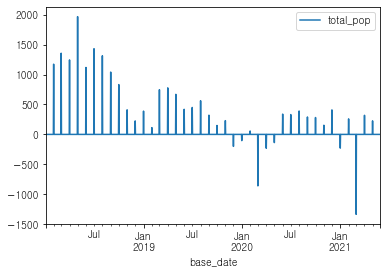

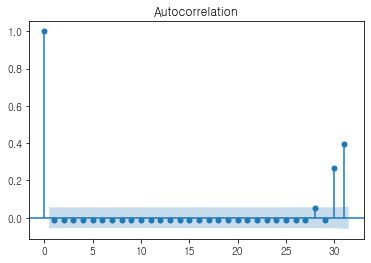

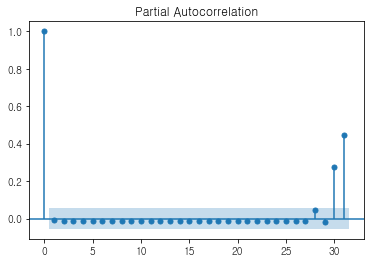

In [71]:
diff_1=data_pop.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [416]:
model=ARIMA(data_pop,order=(3,1,1))
                               
#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit=model.fit(trand='nc',full_output=True,disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.제주_resd_pop   No. Observations:                  568
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -3855.817
Method:                       css-mle   S.D. of innovations            214.594
Date:                Sun, 12 Sep 2021   AIC                           7723.634
Time:                        14:06:21   BIC                           7749.687
Sample:                             1   HQIC                          7733.800
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1562      1.388      2.274      0.023       0.436       5.876
ar.L1.D.제주_resd_pop     0.6645      0.046     14.322      0.000       0.574       0.755
ar.L2.D.제주_resd_

In [417]:
fore=model_fit.forecast(steps=18)
print(fore[0])
# 예측값,stderr,upperbound,lowerbound

[13366.18192984 13399.12714653 13425.78530394 13450.05859042
 13470.40505681 13487.50201657 13502.16593665 13514.79526015
 13525.72944495 13535.27810276 13543.68946657 13551.16490132
 13557.87107712 13563.94511831 13569.49957092 13574.62694835
 13579.40330718 13583.89115625]


In [418]:
dates=pd.date_range('2021-06-01',periods=len(fore[0]))

In [419]:
dates

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18'],
              dtype='datetime64[ns]', freq='D')

In [420]:
forecast=pd.DataFrame(fore[0],columns=['제주_resd_pop_pred'],index=dates)


In [421]:
forecast

,제주_resd_pop_pred
2021-06-01,13366.181930
2021-06-02,13399.127147
2021-06-03,13425.785304
2021-06-04,13450.058590
2021-06-05,13470.405057
2021-06-06,13487.502017
2021-06-07,13502.165937
2021-06-08,13514.795260
2021-06-09,13525.729445
2021-06-10,13535.278103


In [422]:
sub_test=data_test.loc[(data_test['emd_nm']=='구좌읍') &( data_test['base_date']>='2021-06-01')]
sub_test

,emd_nm,em_g,total_pop,제주_resd_ratio,제주_resd_pop,card_use_cnt,base_date
49639,구좌읍,1179950,15955,0.762469,13881.063572,1997.0,2021-06-01
49681,구좌읍,1181050,15955,0.766680,13892.867871,2022.0,2021-06-02
49723,구좌읍,1009750,15955,0.791490,13998.961696,1770.0,2021-06-03
49765,구좌읍,1148400,15955,0.768868,13873.959029,1851.0,2021-06-04
49807,구좌읍,1424100,15955,0.735580,13910.331278,2074.0,2021-06-05
49849,구좌읍,1359850,15955,0.732972,14116.736994,1911.0,2021-06-06
49891,구좌읍,1264300,15955,0.761159,13704.072958,1836.0,2021-06-07
49933,구좌읍,1143050,15955,0.770956,13741.587808,2031.0,2021-06-08
49975,구좌읍,1137550,15955,0.765962,13608.418381,1932.0,2021-06-09
50017,구좌읍,1116000,15955,0.770170,13762.429774,1927.0,2021-06-10


In [423]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
##0.0058254274059394585 0.07510307669011312

print(mean_squared_error(sub_test['제주_resd_pop'],forecast['제주_resd_pop_pred']))
print(mean_absolute_error(sub_test['제주_resd_pop'],forecast['제주_resd_pop_pred']))

112739.34777405817
280.28336008069596


## 전체 읍면동 예측

In [503]:
test_df=pd.DataFrame(columns=['emd_nm'])

In [504]:
for region in data['emd_nm'].unique():
    data_pop=data_train.loc[data_train['emd_nm']==region,['total_pop','base_date']]
    data_pop.set_index(['base_date'],inplace=True)
    data_pop=data_pop.astype('float32')
     #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    
    model=ARIMA(data_pop,order=( 0,1,1))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=dates)
    forecast['emd_nm']=region
    test_df=pd.concat([test_df,forecast])

In [505]:
test_df.reset_index(inplace=True)

In [506]:
test_df.rename(columns={'index':'base_date'},inplace=True)

In [507]:
data_test_pop=data_test[['base_date','emd_nm','total_pop']]

In [508]:
merge1=pd.merge(data_test_pop,test_df,on=['base_date','emd_nm'])

In [509]:
merge1['diff']=merge1['total_pop']-merge1['total_pop_pred']

In [510]:
merge1

,base_date,emd_nm,total_pop,total_pop_pred,diff
0,2021-06-01,건입동,9110,9126.264926,-16.264926
1,2021-06-01,구좌읍,15955,15962.556609,-7.556609
2,2021-06-01,남원읍,19354,19355.690493,-1.690493
3,2021-06-01,노형동,57473,57396.978108,76.021892
4,2021-06-01,대륜동,15277,15240.295930,36.704070
...,...,...,...,...,...
751,2021-06-18,한경면,9495,9487.879691,7.120309
752,2021-06-18,한림읍,24462,24412.300562,49.699438
753,2021-06-18,화북동,24630,24626.313482,3.686518
754,2021-06-18,효돈동,5314,5324.827913,-10.827913


In [511]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge1['total_pop'],merge1['total_pop_pred']))
print(mean_absolute_error(merge1['total_pop'],merge1['total_pop_pred']))

1342.72774353027
25.498664822783415


In [ ]:
#0,1,1 일떄, 1342.72774353027
25.498664822783415

# 제주 resd_ratio예측

In [584]:
test_ratio=pd.DataFrame(columns=['emd_nm'])

In [585]:
for region in data['emd_nm'].unique():
    data_ratio=data_train.loc[data_train['emd_nm']==region,['제주_resd_ratio','base_date']]
    data_ratio.set_index(['base_date'],inplace=True)

    
    model=ARIMA(data_ratio,order=(5,1, 0))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['제주_resd_ratio_pred'],index=dates)
    forecast['emd_nm']=region
    test_ratio=pd.concat([test_ratio,forecast])

In [586]:
test_ratio.reset_index(inplace=True)

In [587]:
test_ratio.rename(columns={'index':'base_date'},inplace=True)

In [588]:
test_ratio

,base_date,emd_nm,제주_resd_ratio_pred
0,2021-06-01,건입동,0.557341
1,2021-06-02,건입동,0.548662
2,2021-06-03,건입동,0.559859
3,2021-06-04,건입동,0.539559
4,2021-06-05,건입동,0.543747
...,...,...,...
751,2021-06-14,한경면,0.722187
752,2021-06-15,한경면,0.722921
753,2021-06-16,한경면,0.722870
754,2021-06-17,한경면,0.722582


In [589]:
data_test_ratio=data_test[['base_date','emd_nm','제주_resd_ratio']]

In [590]:
merge2=pd.merge(data_test_ratio,test_ratio,on=['base_date','emd_nm'])

In [591]:
merge2['diff']=merge2['제주_resd_ratio']-merge2['제주_resd_ratio_pred']

In [592]:
merge2

,base_date,emd_nm,제주_resd_ratio,제주_resd_ratio_pred,diff
0,2021-06-01,건입동,0.536131,0.557341,-0.021211
1,2021-06-01,구좌읍,0.762469,0.732015,0.030454
2,2021-06-01,남원읍,0.760316,0.750815,0.009501
3,2021-06-01,노형동,0.727099,0.745780,-0.018681
4,2021-06-01,대륜동,0.724267,0.729882,-0.005614
...,...,...,...,...,...
751,2021-06-18,한경면,0.754707,0.722267,0.032440
752,2021-06-18,한림읍,0.775363,0.784136,-0.008774
753,2021-06-18,화북동,0.711459,0.728705,-0.017245
754,2021-06-18,효돈동,0.760800,0.756911,0.003889


In [593]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge2['제주_resd_ratio'],merge2['제주_resd_ratio_pred']))
print(mean_absolute_error(merge2['제주_resd_ratio'],merge2['제주_resd_ratio_pred']))

0.0006122465060201161
0.01879588284442535


In [ ]:
##5,1,0 일때, 0.0006122465060201161
0.01879588284442535

# 제주 resd_pop 예측

In [479]:
test_resd_pop=pd.DataFrame(columns=['emd_nm'])

In [480]:
for region in data['emd_nm'].unique():
    data_resd_pop=data_train.loc[data_train['emd_nm']==region,['제주_resd_pop','base_date']]
    data_resd_pop.set_index(['base_date'],inplace=True)
    
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_resd_pop,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_resd_pop)
    arima_p=str(auto)[7]
    arima_p=int(arima_p)
    arima_q=str(auto)[9]
    arima_q=int(arima_q)
    arima_d=str(auto)[11]
    arima_d=int(arima_d)
    
    model=ARIMA(data_resd_pop,order=(arima_p,arima_q,arima_d))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['제주_resd_pop_pred'],index=dates)
    forecast['emd_nm']=region
    test_resd_pop=pd.concat([test_resd_pop,forecast])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=18112.317, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=17918.935, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=17739.579, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=17741.084, Time=0.80 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=17729.966, Time=1.06 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=17731.967, Time=1.35 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=18072.688, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=17789.680, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=17741.186, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=17739.434, Time=1.27 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=17731.967, Time=1.58 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=17901.924, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17742.666, Time=0.80 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17745.227, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17671.978, Time=1.41

 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17155.551, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17154.023, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17074.378, Time=1.41 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=17227.446, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=17153.516, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=17148.979, Time=1.08 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=17217.985, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=17149.337, Time=1.47 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=17112.368, Time=0.24 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 16.713 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=14000.913, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=13834.571, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=13702.641, Time=0.29 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=13699.974, Time=0.66 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=13700.705

 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=20570.210, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=20567.934, Time=1.19 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=20555.494, Time=1.52 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=20552.018, Time=1.70 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=20902.911, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=20622.996, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=20569.441, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=20573.739, Time=1.72 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=20557.952, Time=1.73 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=20727.470, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=20567.190, Time=1.02 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=20538.663, Time=1.12 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=20498.535, Time=1.08 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=20706.819, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=20568.667, Time=1.43

 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=18976.547, Time=1.05 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=18983.285, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=18985.187, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=18882.576, Time=2.03 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=18984.349, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=18967.783, Time=0.25 sec

Best model:  ARIMA(3,1,2)(0,0,0)[1] intercept
Total fit time: 11.526 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=20771.918, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=20639.842, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=20525.506, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=20523.748, Time=0.99 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=20524.577, Time=1.22 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=20513.834, Time=1.75 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=20711.707, Time

 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=18969.450, Time=1.09 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=18963.084, Time=1.48 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19345.376, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=19046.090, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=18984.324, Time=1.03 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=18984.547, Time=1.77 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=18963.982, Time=1.73 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=19174.850, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=18979.285, Time=1.11 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=18950.442, Time=1.59 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=18938.197, Time=1.88 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19152.908, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=18981.284, Time=1.29 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=18968.270, Time=1.62 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=19116.037, Time=0.20

 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=15948.204, Time=1.00 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=15936.388, Time=1.48 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=16083.691, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=15931.469, Time=1.18 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=15934.022, Time=0.22 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 15.062 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=14473.782, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14355.697, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14304.441, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14305.670, Time=0.59 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14307.368, Time=0.74 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=14307.830, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=14408.586, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=14307.695, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=14305.557

 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=12660.405, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=12662.253, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=12658.117, Time=1.34 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=12665.171, Time=0.74 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=12772.938, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=12662.272, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=12660.476, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=12662.122, Time=1.61 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=12741.952, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=12663.814, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=12662.090, Time=0.81 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=12710.574, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=12664.050, Time=0.97 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=12671.812, Time=0.27 sec

Best model:  ARIMA(1,1,3)(0,0,0)[1] intercept
Total fit time:

 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=8794.646, Time=0.52 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=8767.538, Time=0.15 sec

Best model:  ARIMA(5,1,0)(0,0,0)[1] intercept
Total fit time: 8.766 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=7788.868, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7753.284, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7736.790, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7737.204, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7738.786, Time=0.54 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7734.542, Time=0.78 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=7767.109, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7725.225, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7724.272, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7739.062, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7737.468, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=7748.329, Time=0.06 sec

In [481]:
test_resd_pop.reset_index(inplace=True)

In [482]:
test_resd_pop.rename(columns={'index':'base_date'},inplace=True)

In [483]:
test_resd_pop

,base_date,emd_nm,제주_resd_pop_pred
0,2021-06-01,건입동,6792.157360
1,2021-06-02,건입동,6599.298956
2,2021-06-03,건입동,6756.654535
3,2021-06-04,건입동,6528.637242
4,2021-06-05,건입동,6558.948232
...,...,...,...
751,2021-06-14,한경면,7232.115947
752,2021-06-15,한경면,7234.018604
753,2021-06-16,한경면,7237.148931
754,2021-06-17,한경면,7239.596098


In [484]:
data_test_resd_pop=data_test[['base_date','emd_nm','제주_resd_pop']]

In [485]:
merge3=pd.merge(data_test_resd_pop,test_resd_pop,on=['base_date','emd_nm'])

In [486]:
merge3['diff']=merge3['제주_resd_pop']-merge3['제주_resd_pop_pred']

In [487]:
merge3

,base_date,emd_nm,제주_resd_pop,제주_resd_pop_pred,diff
0,2021-06-01,건입동,6749.072768,6792.157360,-43.084592
1,2021-06-01,구좌읍,13881.063572,13366.181930,514.881642
2,2021-06-01,남원읍,14736.993588,14467.576334,269.417254
3,2021-06-01,노형동,54738.205330,54313.033878,425.171452
4,2021-06-01,대륜동,14593.421729,14162.552951,430.868778
...,...,...,...,...,...
751,2021-06-18,한경면,7363.618917,7241.943007,121.675911
752,2021-06-18,한림읍,20990.875850,20860.065488,130.810362
753,2021-06-18,화북동,24719.499267,25065.354704,-345.855438
754,2021-06-18,효돈동,3856.153048,3892.436801,-36.283753


In [489]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge3['제주_resd_pop'],merge3['제주_resd_pop_pred']))
print(mean_absolute_error(merge3['제주_resd_pop'],merge3['제주_resd_pop_pred']))

6436653.950312973
622.1943705235457


# card_use_cnt 예측

In [512]:
test_card=pd.DataFrame(columns=['emd_nm'])

In [513]:
for region in data['emd_nm'].unique():
    data_card=data_train.loc[data_train['emd_nm']==region,['card_use_cnt','base_date']]
    data_card.set_index(['base_date'],inplace=True)
    
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_card,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_card)
    arima_p=str(auto)[7]
    arima_p=int(arima_p)
    arima_q=str(auto)[9]
    arima_q=int(arima_q)
    arima_d=str(auto)[11]
    arima_d=int(arima_d)
    
    model=ARIMA(data_card,order=(arima_p,arima_q,arima_d))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['card_use_cnt_pred'],index=dates)
    forecast['emd_nm']=region
    test_card=pd.concat([test_card,forecast])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=17365.025, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=16940.507, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=16846.673, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=16848.384, Time=0.84 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=16839.555, Time=1.05 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=17262.192, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=16861.843, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=16848.498, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=16842.132, Time=1.41 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=16837.688, Time=1.55 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=17154.767, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=16840.723, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=16832.375, Time=1.16 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=16846.781, Time=1.74 sec
 

 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17481.233, Time=0.93 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17469.483, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17405.498, Time=2.28 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=17732.666, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=17476.308, Time=1.27 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=17469.696, Time=1.86 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=17664.474, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=17463.492, Time=1.50 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=17565.788, Time=0.30 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 19.843 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=14682.182, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14216.786, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14168.373, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14167.938, Time=0.83 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14167.919

 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=19180.877, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=19172.299, Time=1.12 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19142.953, Time=1.37 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19141.957, Time=1.92 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19679.024, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=19238.797, Time=0.93 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=19177.120, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=19147.569, Time=1.67 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=19141.282, Time=1.98 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=19499.872, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=19154.487, Time=1.06 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=19140.058, Time=1.27 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=19158.936, Time=1.90 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19462.281, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=19155.228, Time=1.27

 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=16202.855, Time=1.93 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=16392.233, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=16200.680, Time=1.19 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=16199.767, Time=1.91 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=16341.873, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=16202.572, Time=1.68 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=16314.830, Time=0.27 sec

Best model:  ARIMA(0,1,2)(0,0,0)[1] intercept
Total fit time: 19.109 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=19547.510, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=19102.760, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=19021.630, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=19018.734, Time=1.10 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19016.309, Time=1.45 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19015.866, Time=2.09 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19439.132

 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=18822.692, Time=1.43 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=18818.492, Time=2.05 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19300.556, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=18865.785, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=18834.579, Time=1.15 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=18819.017, Time=1.61 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=18821.402, Time=2.07 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=19150.910, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=18825.283, Time=1.18 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=18814.332, Time=1.07 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=18834.541, Time=2.20 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19107.567, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=18825.547, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=18826.523, Time=1.21 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=19054.202, Time=0.19

 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=14792.590, Time=1.28 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=14793.851, Time=0.91 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=14927.437, Time=0.18 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=14794.152, Time=1.37 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=14865.116, Time=0.25 sec

Best model:  ARIMA(0,1,2)(0,0,0)[1] intercept
Total fit time: 16.277 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=15064.564, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14569.604, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14521.868, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14522.808, Time=0.63 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14524.575, Time=1.03 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=14523.530, Time=1.16 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=14874.505, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=14521.067, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=14522.775

 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=14363.859, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=14375.421, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=14359.814, Time=1.74 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=14589.063, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=14362.456, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=14525.907, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=14364.398, Time=0.97 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=14477.256, Time=0.18 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=14365.518, Time=1.40 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=14456.356, Time=0.23 sec

Best model:  ARIMA(1,1,3)(0,0,0)[1] intercept
Total fit time: 17.655 seconds
 ARIMA(0

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=7747.649, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7518.627, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7509.920, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7510.745, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7512.203, Time=0.45 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7514.187, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=7641.314, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7509.209, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7511.172, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7512.427, Time=0.59 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7514.101, Time=0.79 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=7605.439, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=7511.149, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=7512.880, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=7512.767, Time=0.67 sec
 ARIMA(3,1

In [514]:
test_card.reset_index(inplace=True)

In [515]:
test_card.rename(columns={'index':'base_date'},inplace=True)

In [516]:
test_card

,base_date,emd_nm,card_use_cnt_pred
0,2021-06-01,건입동,2177.407476
1,2021-06-02,건입동,2175.522871
2,2021-06-03,건입동,2182.160154
3,2021-06-04,건입동,2221.073175
4,2021-06-05,건입동,2240.101532
...,...,...,...
751,2021-06-14,한경면,1040.785264
752,2021-06-15,한경면,1041.136625
753,2021-06-16,한경면,1041.487986
754,2021-06-17,한경면,1041.839347


In [517]:
data_test_card=data_test[['base_date','emd_nm','card_use_cnt']]

In [518]:
merge4=pd.merge(data_test_card,test_card,on=['base_date','emd_nm'])

In [519]:
merge4['diff']=merge4['card_use_cnt']-merge4['card_use_cnt_pred']

In [520]:
merge4

,base_date,emd_nm,card_use_cnt,card_use_cnt_pred,diff
0,2021-06-01,건입동,2313.0,2177.407476,135.592524
1,2021-06-01,구좌읍,1997.0,1873.626926,123.373074
2,2021-06-01,남원읍,2038.0,1987.676197,50.323803
3,2021-06-01,노형동,15156.0,15758.929181,-602.929181
4,2021-06-01,대륜동,2917.0,2945.320407,-28.320407
...,...,...,...,...,...
751,2021-06-18,한경면,955.0,1042.190708,-87.190708
752,2021-06-18,한림읍,2651.0,2883.017650,-232.017650
753,2021-06-18,화북동,5684.0,5670.393224,13.606776
754,2021-06-18,효돈동,849.0,827.178723,21.821277


In [521]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge4['card_use_cnt'],merge4['card_use_cnt_pred']))
print(mean_absolute_error(merge4['card_use_cnt'],merge4['card_use_cnt_pred']))

2998365.8284604712
477.2288586246051
